# 2-3. Scatter Plot 사용하기

## 1. 기본 Scatter Plot

### 1-1. scatter() 기본


- `scatter()`

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

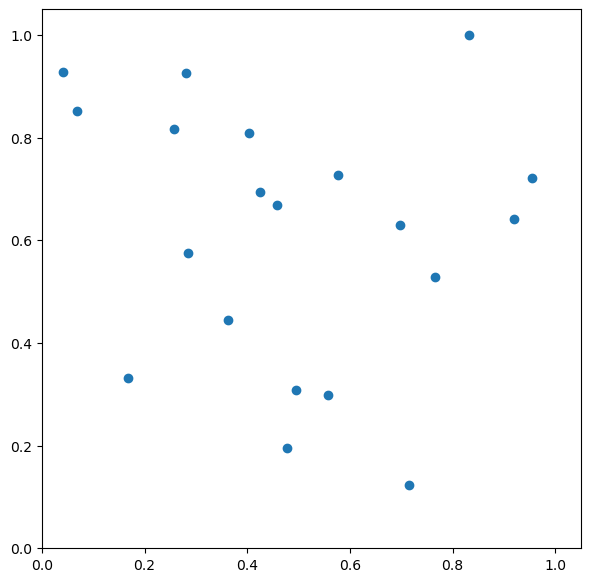

In [2]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, aspect=1)

np.random.seed(970725)

x = np.random.rand(20)
y = np.random.rand(20)

ax.scatter(x, y)
ax.set_xlim(0, 1.05)
ax.set_ylim(0, 1.05)

plt.show()

### 1-2. Scatter Plot의 요소

- 색 (color)
- 모양 (marker)
- 크기 (size)


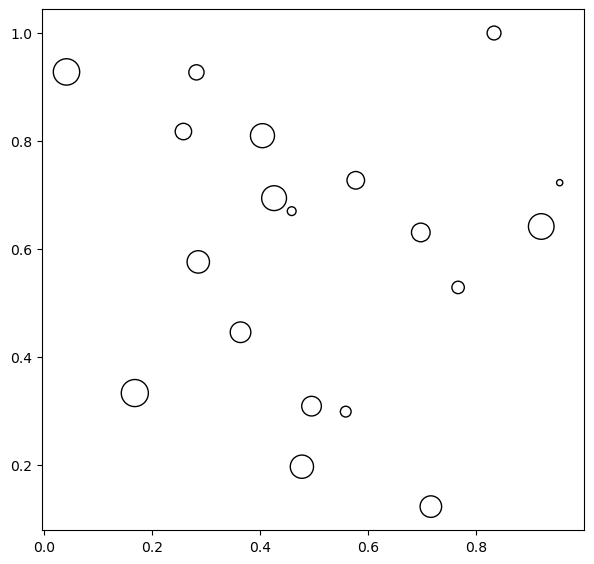

In [3]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, aspect=1)

np.random.seed(970725)

x = np.random.rand(20)
y = np.random.rand(20)
s = np.arange(20) * 20

ax.scatter(x, y, 
           s= s,
           c='white',
           marker='o',
           linewidth=1,
           edgecolor='black')

plt.show()

## 2. 정확한 Scatter Plot

### 2-0. 실습

- 이론적인 부분은 다른 라이브러리를 사용하는 것이 더 편리 (통계와 차트 seaborn에서 더 상세)
- [붓꽃 데이터셋](https://www.kaggle.com/uciml/iris)을 사용하여 시각화해봅시다.
    - 상관관계와 봐야하는 것 3가지(클러스터, 값의 차이, 이상치)
    - 어떻게 커스텀할 수 있는지

In [5]:
iris = pd.read_csv('./iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


꽃받침의 길이와 너비의 관계를 살피기 위해 산점도를 그려봅시다.

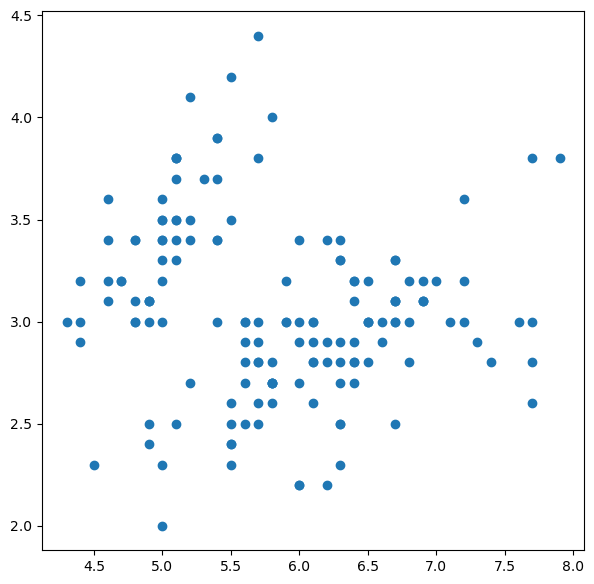

In [7]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

ax.scatter(x=iris['SepalLengthCm'], y=iris['SepalWidthCm'])

plt.show()

특정 조건에 따라 색을 다르게 하면 주의를 더 줄 수 있습니다.

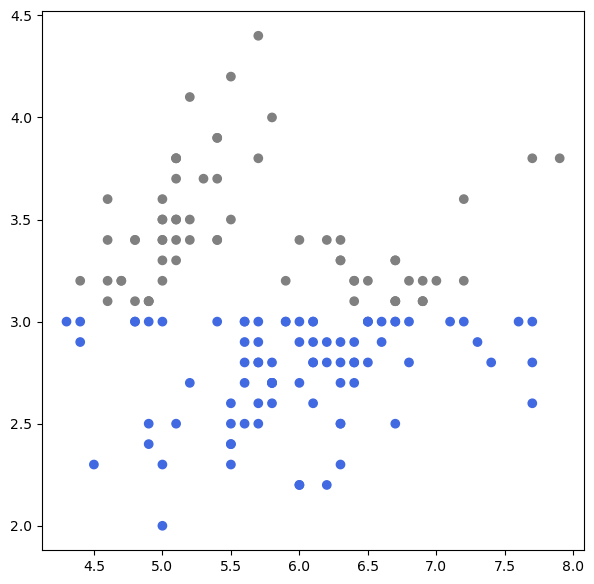

In [8]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

slc_mean = iris['SepalLengthCm'].mean()
swc_mean = iris['SepalWidthCm'].mean()

ax.scatter(x=iris['SepalLengthCm'], 
           y=iris['SepalWidthCm'],
           c=['royalblue' if yy <= swc_mean else 'gray' for yy in iris['SepalWidthCm']]
          )

plt.show()

이제 꽃의 종류에 따라 구분하여 그려보겠습니다.

![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

색을 위와 같이 반복문과 조건문으로 구분할 수도 있지만 범례를 사용할 예정이므로 세 번 나눠그리는 편이 더 편합니다.

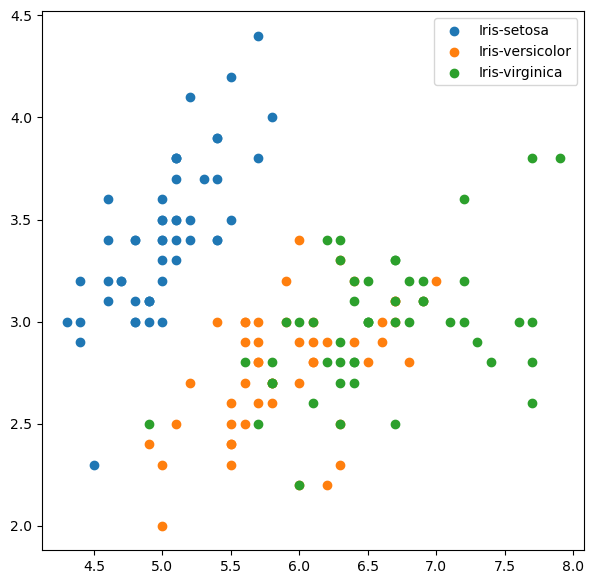

In [9]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

for species in iris['Species'].unique():
    iris_sub = iris[iris['Species']==species]
    ax.scatter(x=iris_sub['SepalLengthCm'], 
               y=iris_sub['SepalWidthCm'], 
               label=species)

ax.legend()    
plt.show()

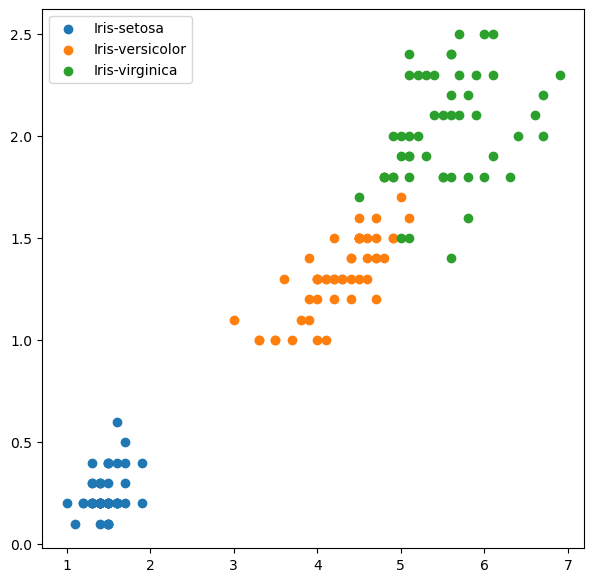

In [10]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

for species in iris['Species'].unique():
    iris_sub = iris[iris['Species']==species]
    ax.scatter(x=iris_sub['PetalLengthCm'], 
               y=iris_sub['PetalWidthCm'], 
               label=species)

ax.legend()    
plt.show()

시각적인 주의를 주기 위해서 선을 사용할 수도 있습니다. (3차트의 요소-4moreinfo)

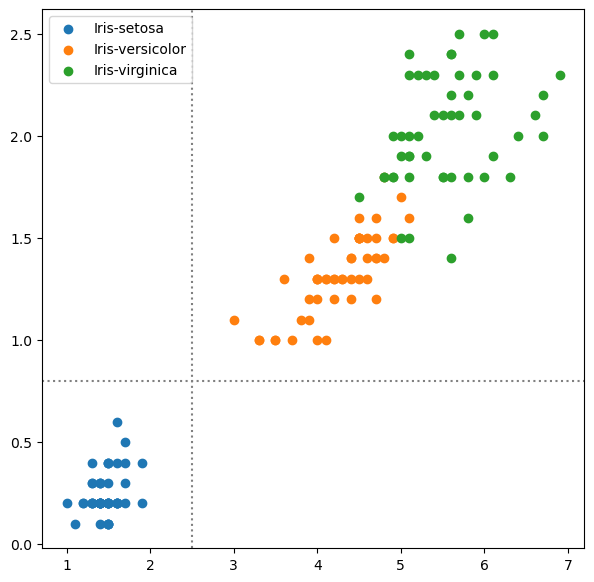

In [11]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

for species in iris['Species'].unique():
    iris_sub = iris[iris['Species']==species]
    ax.scatter(x=iris_sub['PetalLengthCm'], 
               y=iris_sub['PetalWidthCm'], 
               label=species)

ax.axvline(2.5, color='gray', linestyle=':')    
ax.axhline(0.8, color='gray', linestyle=':')    
ax.legend()    
plt.show()

좀 더 다양한 관점에서 보기 위해 다음과 같이 그려보겠습니다. (3장 차트의 요소 Facet 참고)

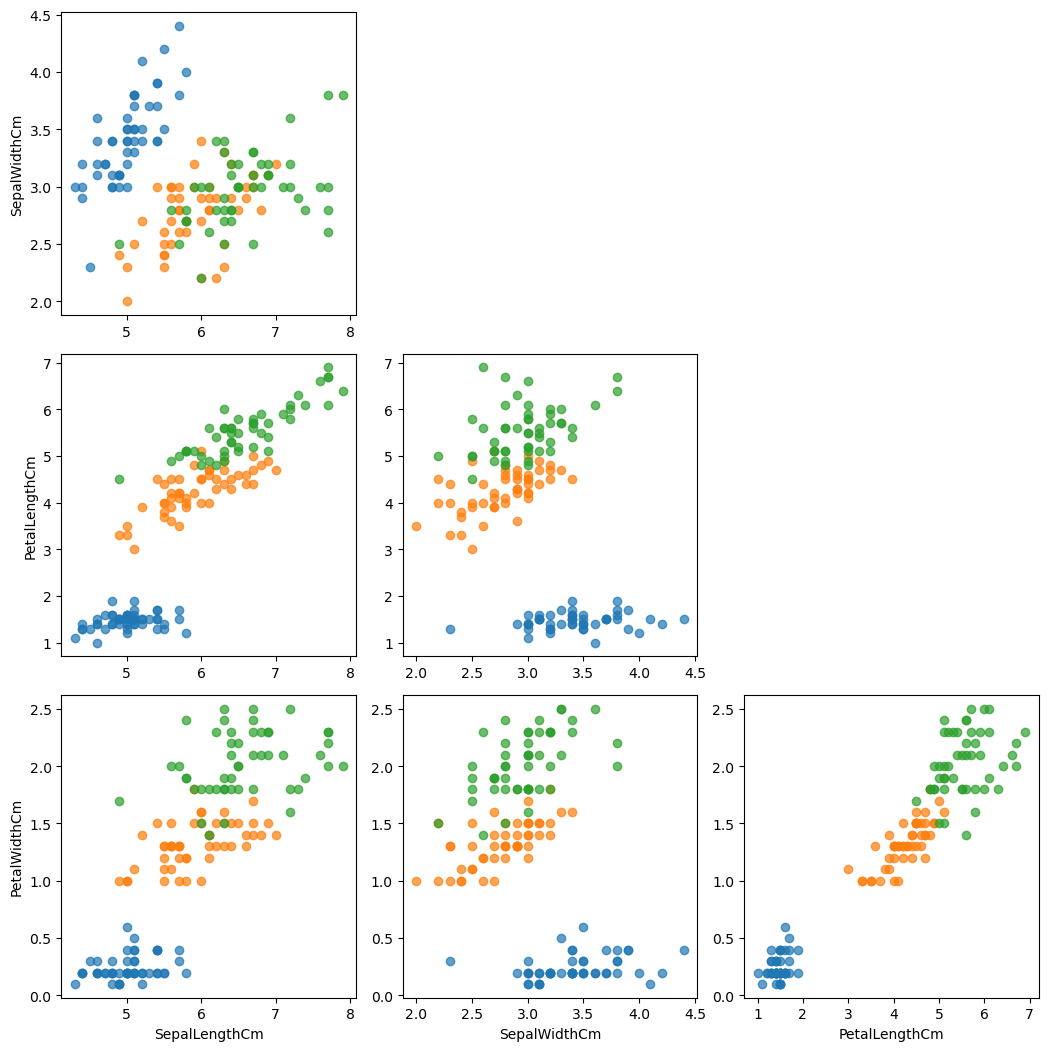

In [12]:
fig, axes = plt.subplots(4, 4, figsize=(14, 14))

feat = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for i, f1 in enumerate(feat):
    for j, f2 in enumerate(feat):
        if i <= j : 
            axes[i][j].set_visible(False)
            continue
        for species in iris['Species'].unique():
            iris_sub = iris[iris['Species']==species]
            axes[i][j].scatter(x=iris_sub[f2], 
                               y=iris_sub[f1], 
                               label=species, 
                               alpha=0.7)
        if i == 3: axes[i][j].set_xlabel(f2)
        if j == 0: axes[i][j].set_ylabel(f1)

plt.tight_layout()        
plt.show()

> 나머지 구현 방법(2d hist와 contour plot)은 4.통계와 차트 relation에서 더 자세하게 다루도록 하겠습니다.

###**콘텐츠 라이선스**

<font color='red'><b>**WARNING**</b></font> : **본 교육 콘텐츠의 지식재산권은 재단법인 네이버커넥트에 귀속됩니다. 본 콘텐츠를 어떠한 경로로든 외부로 유출 및 수정하는 행위를 엄격히 금합니다.** 다만, 비영리적 교육 및 연구활동에 한정되어 사용할 수 있으나 재단의 허락을 받아야 합니다. 이를 위반하는 경우, 관련 법률에 따라 책임을 질 수 있습니다.

